# Twitter Sentimental Analysis using Naive Bayes Classification

## Dataset Prepration

In [54]:
# Dataset prepration

import pandas as pd

twitter_training = pd.read_csv('twitter_training.csv', delimiter=',', header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])

twitter_validation = pd.read_csv('twitter_validation.csv', delimiter=',', header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])

twitter_training


,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [55]:
# Handle missing values (if any)
twitter_training.dropna(inplace=True)
twitter_validation.dropna(inplace=True)

In [56]:
# Remove duplicates
twitter_training.drop_duplicates(subset=['Text'], keep='first', inplace=True)
twitter_validation.drop_duplicates(subset=['Text'], keep='first', inplace=True)

In [57]:
twitter_training

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## Text Preprocessing

In [58]:
# Preprocessing:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
def preprocess_text(text):
    # remove Punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    text = text.lower()
    
    #Tokenise teh text or splitup into words
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply Stemming in the text
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join Tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

In [60]:
twitter_training['processed_text'] = twitter_training['Text'].apply(preprocess_text)
twitter_validation['processed_text'] = twitter_validation['Text'].apply(preprocess_text)

## Tokenization

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Train and Transform thr processed text to get Tokens
tokens = vectorizer.fit_transform(twitter_training['processed_text'])

# convert tokens to a DataFrame  (optional)
#tokens_df = pd.DataFrame(tokens.toarray(), columns=vectorizer.get_feature_names_out())

  ## Feature Extraction                                               

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit transform tokenized data to get TF_IDF features
tfidf_features = tfidf_vectorizer.fit_transform(twitter_training['processed_text'])
tfidf_featuresv = tfidf_vectorizer.transform(twitter_validation['processed_text'])

# TF-IDF -> Features to a DataFrame
#tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


## Naive Bayes Classification model

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Vectorization of the Text Data
X_train = vectorizer.fit_transform(twitter_training['processed_text'])
X_test = vectorizer.transform(twitter_validation['processed_text'])


y_train = twitter_training['Sentiment']
y_test = twitter_validation['Sentiment']

In [64]:
# Create a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the Naive Bayes classifier on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Model Evaluation

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [66]:
# Predict sentiment on the test set
y_pred = nb_classifier.predict(X_test)
y_pred

array(['Irrelevant', 'Neutral', 'Negative', 'Negative', 'Neutral',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Neutral', 'Positive', 'Negative', 'Neutral', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Neutral', 'Irrelevant', 'Negative', 'Neutral',
       'Neutral', 'Negative', 'Negative', 'Irrelevant', 'Negative',
       'Positive', 'Negative', 'Neutral', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Neutral', 'Positive',
       'Neutral', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Irrelevant',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Irrelevant', 'Negative',
       'Neutral', 'Negative', 'Irrelevant', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Posit

In [67]:
# Calculate Accuracy of the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7917917917917918


In [68]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.8066891394989725
Recall: 0.7917917917917918
F1-score: 0.7908827313798729


In [69]:
# Perform cross-validation to assess model performance
cv_scores = cross_val_score(nb_classifier, tfidf_features, twitter_training['Sentiment'], cv=5, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f'Cross-Validation Accuracy: {average_cv_accuracy}')

Cross-Validation Accuracy: 0.43529291881439225


In [70]:
y_pred = nb_classifier.predict(X_test)[5]
y_pred


'Negative'

In [71]:
# Define a function to predict sentiment for user input
def predict_sentiment(user_input):
    # Preprocess the user input (similar to what was done for the training data)
    processed_input = preprocess_text(user_input)
    
    # Convert the processed input to a numerical feature vector using the same vectorizer
    user_input_vector = vectorizer.transform([processed_input])
    
    # Predict the sentiment using the loaded model
    sentiment = loaded_model.predict(user_input_vector)[0]
    
    return sentiment


In [72]:
import joblib

# Save the trained model to a file
joblib.dump(nb_classifier, 'SentimentAnalysis_Twitter_model.pkl')


['SentimentAnalysis_Twitter_model.pkl']

In [73]:
# Define a function to predict sentiment for user input
def predict_sentiment(user_input):
    # Preprocess the user input (similar to what was done for the training data)
    processed_input = preprocess_text(user_input)
    
    # Convert the processed input to a numerical feature vector using the same vectorizer
    user_input_vector = vectorizer.transform([processed_input])
    
    # Predict the sentiment using the loaded model
    sentiment = loaded_model.predict(user_input_vector)[0]
    
    return sentiment

In [74]:
# Load the trained model from the file
loaded_model = joblib.load('SentimentAnalysis_Twitter_model.pkl')
while True:
    user_input = input("Enter a Twitter review (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {sentiment}")

Enter a Twitter review (or 'exit' to quit): i will break your legs
Predicted Sentiment: Negative
Enter a Twitter review (or 'exit' to quit): exit


# Data Distribution Plot

## Histogram 

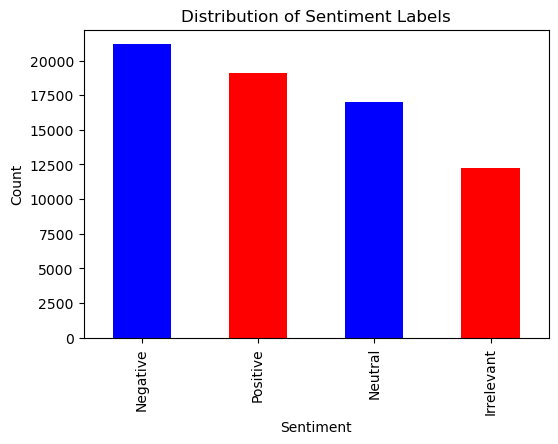

In [75]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels (positive/negative)
plt.figure(figsize=(6, 4))
twitter_training['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Word Frequency Analysis

## Word Cloud

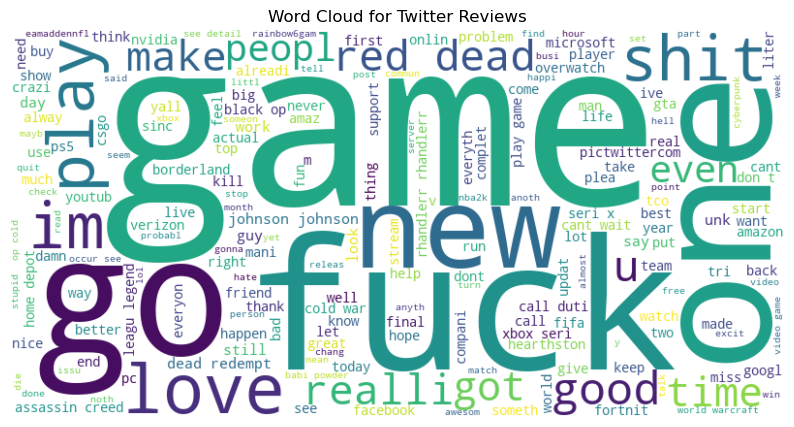

In [76]:
from wordcloud import WordCloud

# Generate a word cloud visualization for most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(twitter_training['processed_text']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Twitter Reviews')
plt.show()


 ## Bar Plot for Top N Most Frequent Words

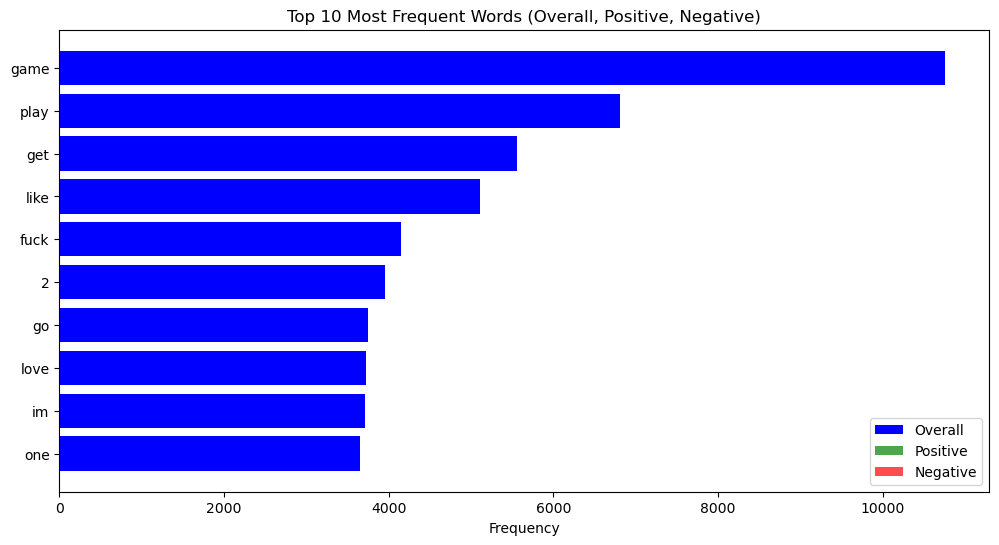

In [77]:
from collections import Counter

# Get the top N most frequent words
n = 10  # Change N as needed
word_counts = Counter(' '.join(twitter_training['processed_text']).split())
most_common_words = word_counts.most_common(n)

# Separate by sentiment (positive/negative)
positive_reviews = twitter_training[twitter_training['Sentiment'] == 'positive']
negative_reviews = twitter_training[twitter_training['Sentiment'] == 'negative']

# Count top N words in each sentiment
positive_word_counts = Counter(' '.join(positive_reviews['processed_text']).split())
negative_word_counts = Counter(' '.join(negative_reviews['processed_text']).split())

# Plot the top N words for both sentiments
plt.figure(figsize=(12, 6))
plt.barh(range(n), [count for word, count in most_common_words], color='blue', label='Overall')
plt.barh(range(n), [positive_word_counts[word] for word, _ in most_common_words], color='green', label='Positive', alpha=0.7)
plt.barh(range(n), [-negative_word_counts[word] for word, _ in most_common_words], color='red', label='Negative', alpha=0.7)
plt.yticks(range(n), [word for word, _ in most_common_words])
plt.xlabel('Frequency')
plt.title(f'Top {n} Most Frequent Words (Overall, Positive, Negative)')
plt.legend(loc='lower right')
plt.gca().invert_yaxis()
plt.show()


# Model Performance Evaluation Plots:

## Confusion Matrix

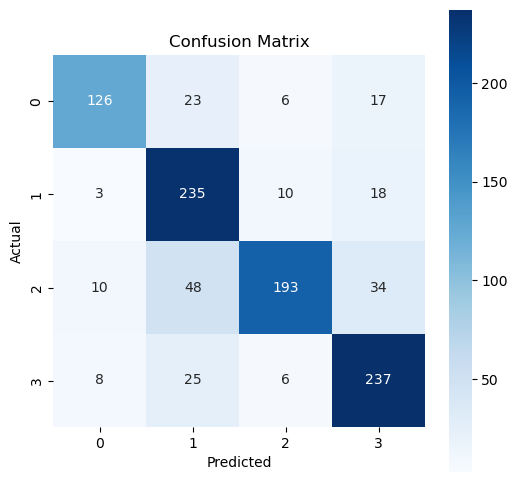

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
y_pred = nb_classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
